## Assignments
The best way to learn plotting is to make a lot of plots. To complete the following you may need to explore the seaborn documentation.

1. Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:
    * Choose one variable and plot that variable four different ways.
    * Choose two continuous variables, and plot them three different ways.
    * Choose one continuous variable and one categorical variable, and plot them six different ways.
    * Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.
2. Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
    * Probability distributions
    * Bivariate relationships
    * Whether the distributions or the relationships vary across groups
    * Accompany your plot with a written description of what you see.

When you've completed these exercises, share your results with your mentor.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline


In [2]:
# Loading dataset to explore.
attrition = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
attrition.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Age,41,49,37,33,27,32,59,30,38,36,...,29,50,39,31,26,36,39,27,49,34
Attrition,Yes,No,Yes,No,No,No,No,No,No,No,...,No,Yes,No,No,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,...,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591,1005,1324,1358,216,1299,...,468,410,722,325,1167,884,613,155,1023,628
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,...,Research & Development,Sales,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,1,8,2,3,2,2,3,24,23,27,...,28,28,24,5,5,23,6,4,2,8
Education,2,1,2,4,1,2,3,1,3,3,...,4,3,1,3,3,2,1,3,3,3
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical,Life Sciences,Life Sciences,Medical,...,Medical,Marketing,Marketing,Medical,Other,Medical,Medical,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeNumber,1,2,4,5,7,8,10,11,12,13,...,2054,2055,2056,2057,2060,2061,2062,2064,2065,2068


In [3]:
# Creating groups by Ages

teeniesomethings = attrition.loc[(attrition['Age']<20)]
twentysomethings = attrition.loc[(attrition['Age']>=20)&(attrition['Age']<30)]
thirtysomethings = attrition.loc[(attrition['Age']>=30)&(attrition['Age']<40)]
fortysomethings = attrition.loc[(attrition['Age']>=40)&(attrition['Age']<50)]
fiftysomethings = attrition.loc[(attrition['Age']>=50)&(attrition['Age']<60)]
sixtysomethings = attrition.loc[(attrition['Age']>=60)&(attrition['Age']<100)]
twentysomethings.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
15,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,3,80,1,10,1,3,10,9,8,8
17,22,No,Non-Travel,1123,Research & Development,16,2,Medical,1,22,...,2,80,2,1,2,2,1,0,0,0


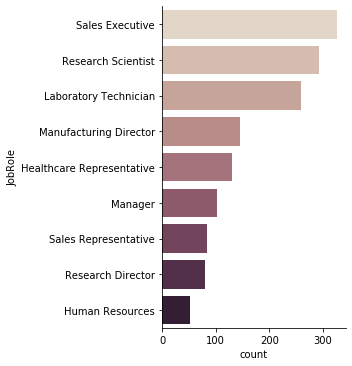

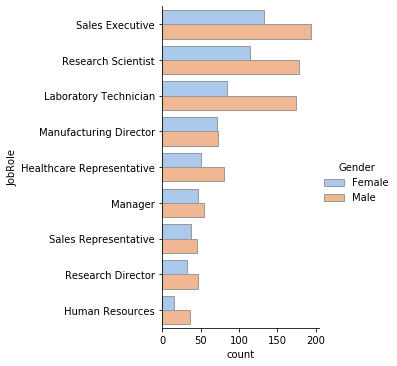

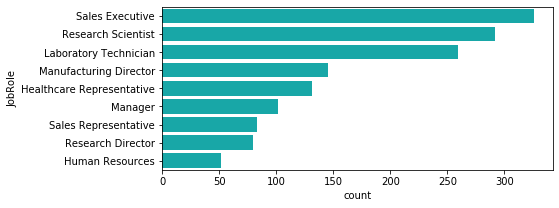

In [4]:
#one variable plotted four different ways (using bar plots, pointplots, 
#scatterplots)

# using countplot
sns.catplot(y="JobRole", kind="count", palette="ch:.25", data=attrition)

# using countplot
sns.catplot(y="JobRole", hue="Gender", kind="count", palette="pastel", edgecolor=".6", data=attrition)

f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="JobRole", data=attrition, color="c");

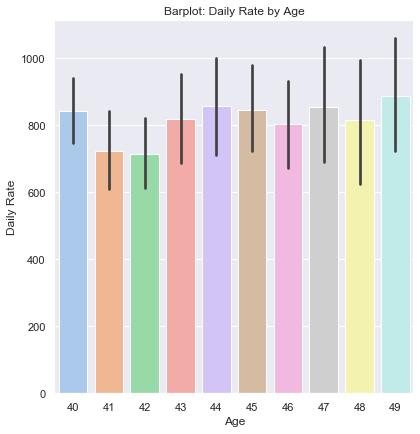

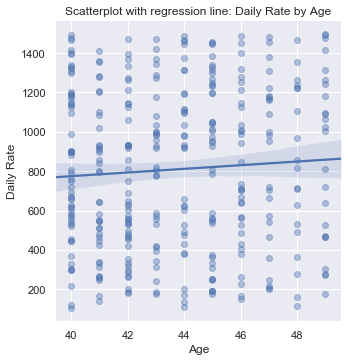

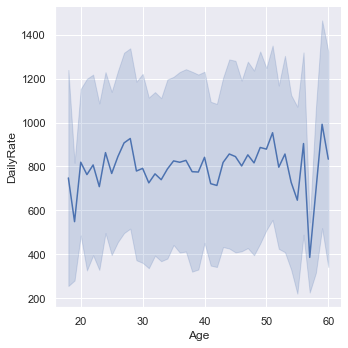

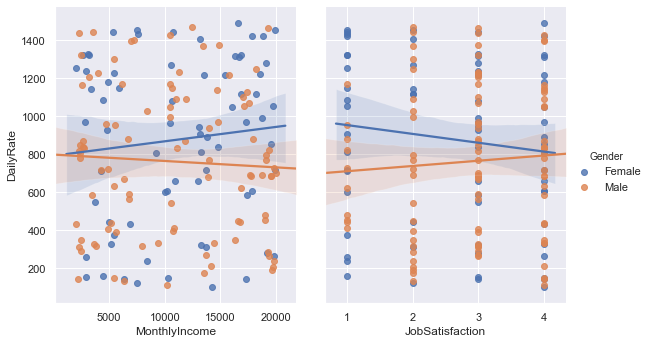

In [5]:
#two continuous variables plotted three different ways

# Setting the overall aesthetic.
sns.set(style="darkgrid")

# Using catplot
g = sns.catplot(x="Age", y="DailyRate", data=fortysomethings,
                   height=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Daily Rate")
g.set_xlabels("Age")
plt.title('Barplot: Daily Rate by Age')
plt.show()

#Using scatterplot
g = sns.lmplot(y='DailyRate', 
               x='Age',
               data=fortysomethings, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Daily Rate")
g.set_xlabels("Age")
plt.title('Scatterplot with regression line: Daily Rate by Age')
plt.show()


sns.relplot(x="Age", y="DailyRate", kind="line", ci="sd", data=attrition)


# Using pairplot
sns.pairplot(fiftysomethings, x_vars=["MonthlyIncome", "JobSatisfaction"], y_vars=["DailyRate"],
             hue="Gender", height=5, aspect=.8, kind="reg");

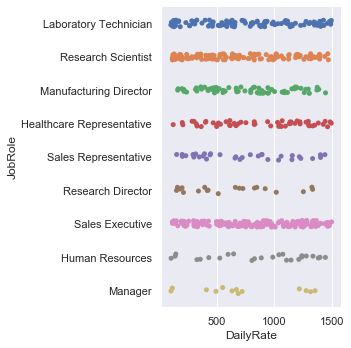

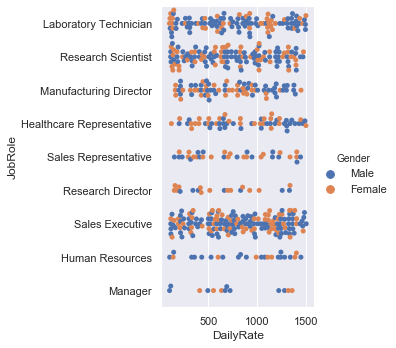

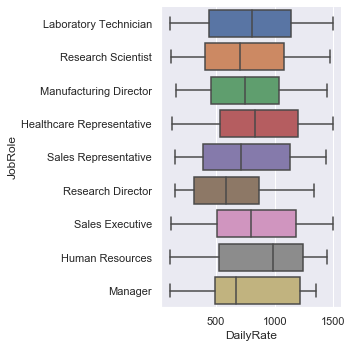

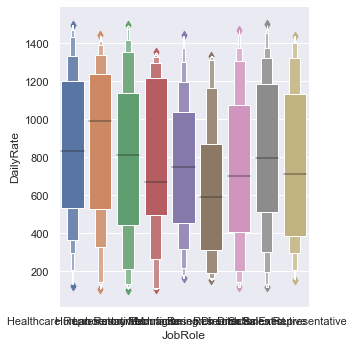

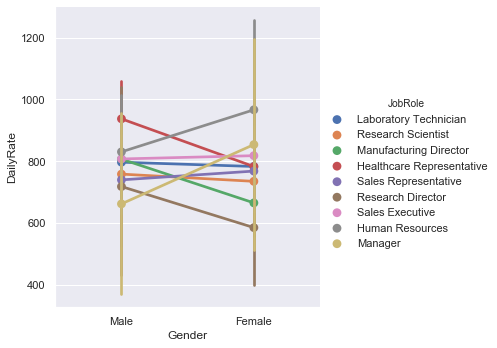

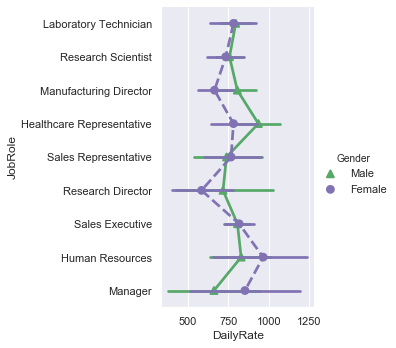

In [6]:
#one continuous variable and one categorical variable plotted six different 
#ways.

# stripplot
sns.catplot(x="DailyRate", y="JobRole", data=thirtysomethings)

# swarmplot
sns.catplot(x="DailyRate", y="JobRole", hue="Gender", kind="swarm", data=thirtysomethings)

# boxplot
sns.catplot(x="DailyRate", y="JobRole", kind="box", data=thirtysomethings)

# boxenplot
sns.catplot(y="DailyRate", x="JobRole", kind="boxen", data=thirtysomethings.sort_values("JobRole"))

# pointplot
sns.catplot(x="Gender", y="DailyRate", hue="JobRole", kind="point", data=thirtysomethings)

# second pointplot
sns.catplot(y="JobRole", x="DailyRate", hue="Gender",
            palette={"Male": "g", "Female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=thirtysomethings)

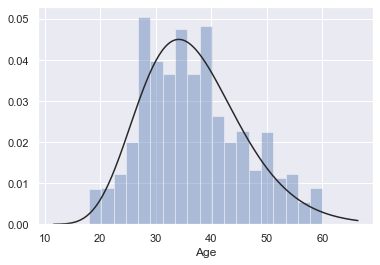

In [7]:
# Working with a dataset with at least four continuous variables 
# and one categorical variable
# Continuous: Age, DailyRate, TotalWorkingYears, and YearsAtCompany
# Categorical: Department


xa = attrition['Age']
sns.distplot(xa, kde=False, fit=stats.gamma)

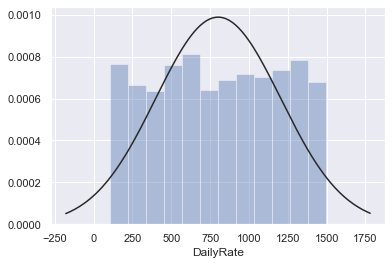

In [8]:
xd = attrition['DailyRate']
sns.distplot(xd, kde=False, fit=stats.gamma)

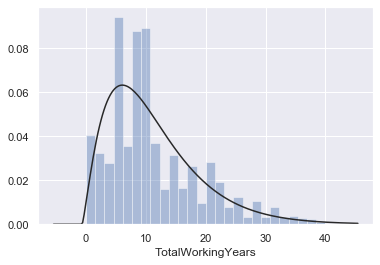

In [9]:
xt = attrition['TotalWorkingYears']
sns.distplot(xt, kde=False, fit=stats.gamma)

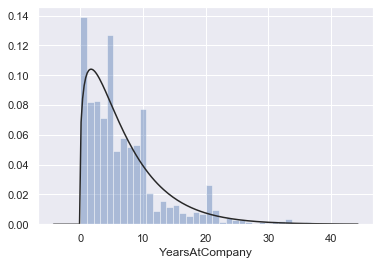

In [10]:
xy = attrition['YearsAtCompany']
sns.distplot(xy, kde=False, fit=stats.gamma)

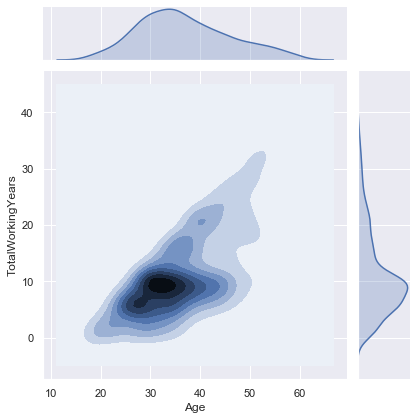

In [11]:
sns.jointplot(x="Age", y="TotalWorkingYears", data=attrition, kind="kde")

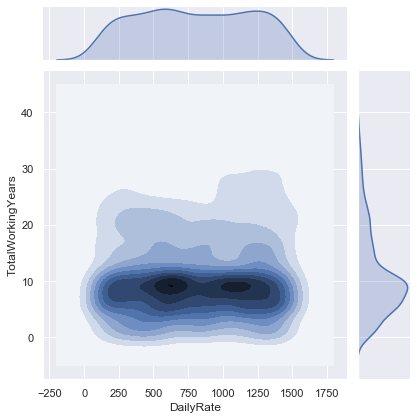

In [12]:
sns.jointplot(x="DailyRate", y="TotalWorkingYears", data=attrition, kind="kde")

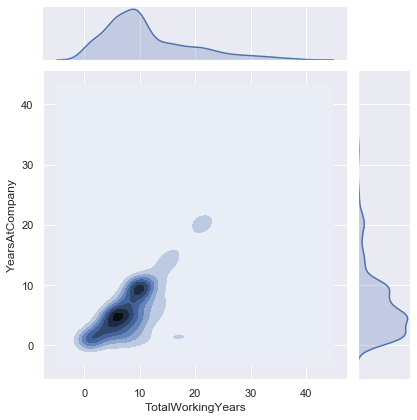

In [13]:
sns.jointplot(x="TotalWorkingYears", y="YearsAtCompany", data=attrition, kind="kde")

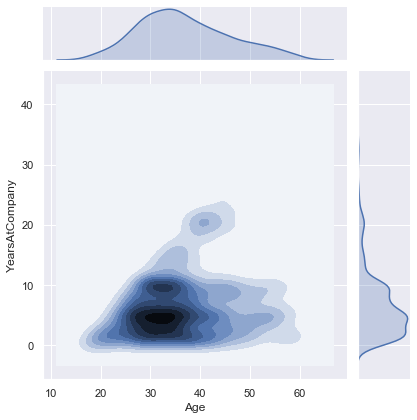

In [14]:
sns.jointplot(x="Age", y="YearsAtCompany", data=attrition, kind="kde")

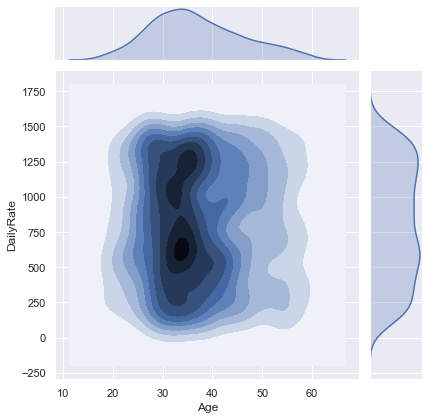

In [15]:
sns.jointplot(x="Age", y="DailyRate", data=attrition, kind="kde")